# Task4

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
from scipy.integrate import solve_ivp
from utils import logistic_map,bifurcation_diagram,plot_cobweb,lorenz_system

##  Part 1
The logistic map is defined as $x_{n+1}=rx_n(1-x_n), n\in \mathbb{N}$, which is 



Text(0.5, 1.0, 'Bifurcation Diagram - Logistic Map')

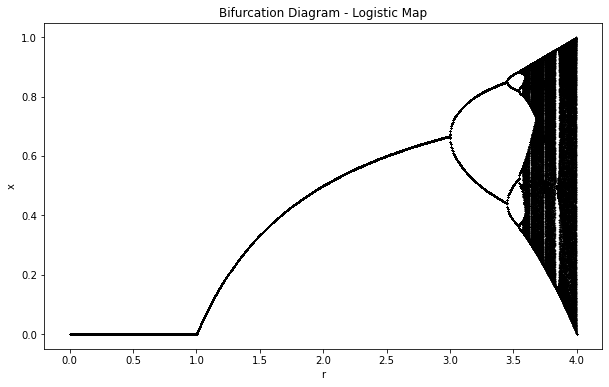

In [2]:
# Parameters
r_values = np.linspace(0, 4, 1000)  # Range of parameter r
iterations = 1000  # Total iterations per r value
discard = 500  # Number of initial iterations to discard

# Generate bifurcation diagram
steady_states, x_values = bifurcation_diagram(r_values, iterations, discard)

# Plot bifurcation diagram
plt.figure(figsize=(10, 6))
for i, r in enumerate(r_values):
    plt.scatter([r] * len(x_values[i]), x_values[i], s=0.1, c='k')

plt.xlabel('r')
plt.ylabel('x')
plt.title('Bifurcation Diagram - Logistic Map')




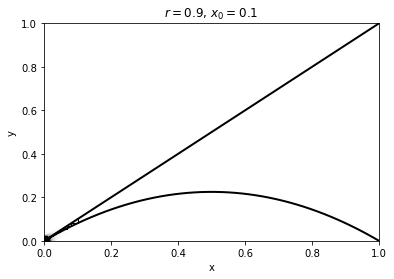

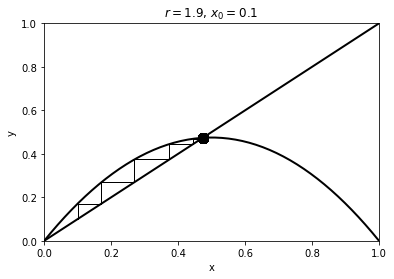

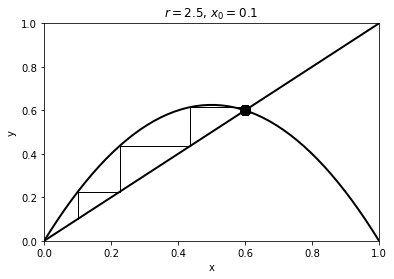

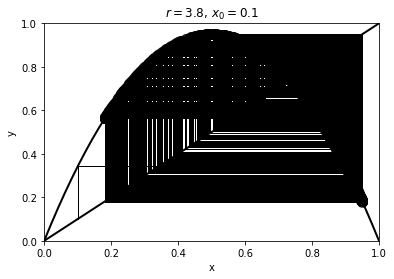

In [3]:
#Plot Cobweb 
plot_cobweb(logistic_map, 0.9, 0.1, iterations)
plot_cobweb(logistic_map, 1.9, 0.1, iterations)
plot_cobweb(logistic_map, 2.5, 0.1, iterations)
plot_cobweb(logistic_map, 3.8, 0.1, iterations)

# Part2

## Step 1: Visualize a single trajectory of the Lorenz system starting at x0 = (10, 10, 10) 

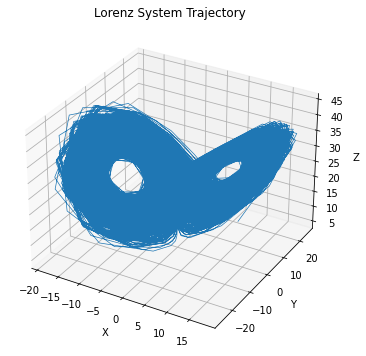

In [4]:
# Set parameter values and initial conditions
sigma = 10
beta = 8/3
rho = 28
x0 = np.array([10, 10, 10])

# Solve the Lorenz system
sol = solve_ivp(
    fun=lambda t, xyz: lorenz_system(t, xyz, sigma, beta, rho),
    t_span=[0, 1000],
    y0=x0,
    method='RK45'
)

# Plot the trajectory
fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111, projection='3d')
ax.plot(sol.y[0], sol.y[1], sol.y[2], linewidth=0.7)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('Lorenz System Trajectory')
plt.show()


## Step 2: Test the initial condition dependence by plotting another trajectory.

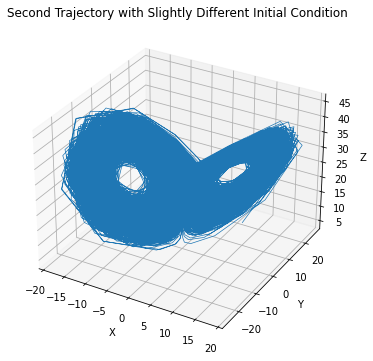

In [5]:
# Set a different initial condition
x_hat_0 = np.array([10 + 1e-8, 10, 10])

# Solve for the second trajectory
sol_hat = solve_ivp(
    fun=lambda t, xyz: lorenz_system(t, xyz, sigma, beta, rho),
    t_span=[0, 1000],
    y0=x_hat_0,
    method='RK45'
)

# Plot the second trajectory
fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111, projection='3d')
ax.plot(sol_hat.y[0], sol_hat.y[1], sol_hat.y[2], linewidth=0.7)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('Second Trajectory with Slightly Different Initial Condition')
plt.show()


## Step 3: Determine the time at which the difference between the points on the trajectory exceeds 1.

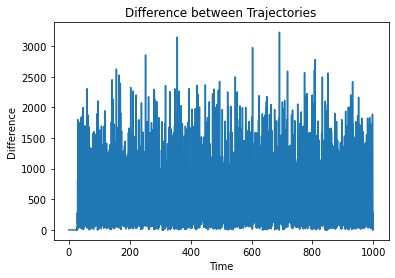

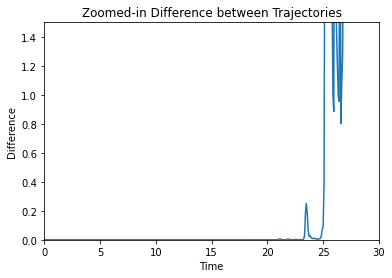

The difference becomes greater than 1 at t = 25.154737343278846 seconds


In [6]:
# Synchronize the time steps
min_len = min(sol.y.shape[1], sol_hat.y.shape[1])
sol.y = sol.y[:, :min_len]
sol_hat.y = sol_hat.y[:, :min_len]

# Compute the difference between the trajectories
diff = [np.linalg.norm(sol.y[:, t] - sol_hat.y[:, t]) ** 2 for t in range(len(sol.y[0]))]
time = np.linspace(0, 1000, len(diff))

# Plotting the difference between trajectories
plt.plot(time, diff)
plt.xlabel("Time")
plt.ylabel("Difference")
plt.title("Difference between Trajectories")
plt.show()

# Zoomed-in plot of the difference between trajectories
plt.plot(time, diff)
plt.xlim(0, 30)
plt.ylim(0, 1.5)
plt.xlabel("Time")
plt.ylabel("Difference")
plt.title("Zoomed-in Difference between Trajectories")
plt.show()

# Find the time when the difference exceeds 1
step = next((i for i, d in enumerate(diff) if d > 1), None)
if step is not None:
    time_exceed = time[step]
    print(f"The difference becomes greater than 1 at t = {time_exceed} seconds")
else:
    print("The difference does not exceed 1 within the given time")

## Step 4: Change ρ to 0.5 and compute and plot the two trajectories. Determine if there is a bifurcation.

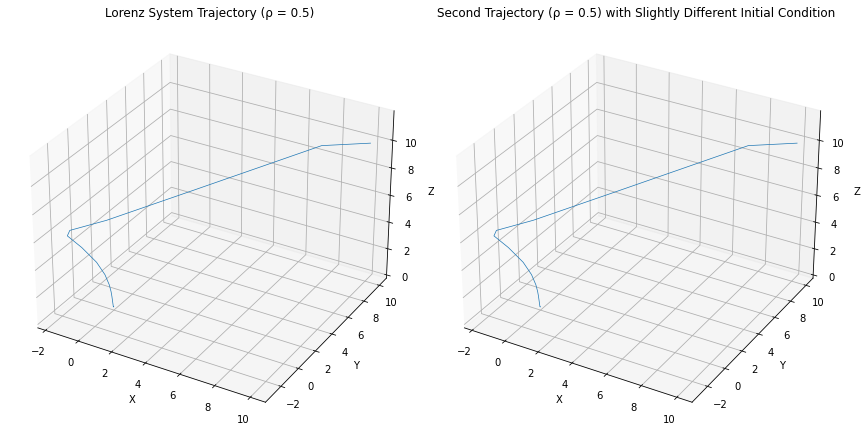

In [7]:
# Update the value of ρ
rho_new = 0.5

# Solve the Lorenz system with the new ρ value
sol_new = solve_ivp(
    fun=lambda t, xyz: lorenz_system(t, xyz, sigma, beta, rho_new),
    t_span=[0, 1000],
    y0=x0,
    method='RK45'
)

sol_hat_new = solve_ivp(
    fun=lambda t, xyz: lorenz_system(t, xyz, sigma, beta, rho_new),
    t_span=[0, 1000],
    y0=x_hat_0,
    method='RK45'
)

# Plot the trajectories
fig = plt.figure(figsize=(12, 6))
ax1 = fig.add_subplot(121, projection='3d')
ax1.plot(sol_new.y[0], sol_new.y[1], sol_new.y[2], linewidth=0.7)
ax1.set_xlabel('X')
ax1.set_ylabel('Y')
ax1.set_zlabel('Z')
ax1.set_title('Lorenz System Trajectory (ρ = 0.5)')

ax2 = fig.add_subplot(122, projection='3d')
ax2.plot(sol_hat_new.y[0], sol_hat_new.y[1], sol_hat_new.y[2], linewidth=0.7)
ax2.set_xlabel('X')
ax2.set_ylabel('Y')
ax2.set_zlabel('Z')
ax2.set_title('Second Trajectory (ρ = 0.5) with Slightly Different Initial Condition')

plt.tight_layout()
plt.show()
